# Data Handling
## EDA & Preprocess
### Data
1. DKTC(Dataset of Korean Threatening Conversations)의 훈련 데이터를 살펴봅니다. class별 데이터의 분포를 분석하고 문장 길이를 시각화 합니다.
    - [tunib-data](https://github.com/tunib-ai/DKTC)
    - train.csv : idx, class, conversation
    - class : '협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화'
 
 
2. 일반 대화를 추가하고 문장 길이를 기준으로 하여 train 데이터와의 class 분포를 맞춥니다. 데이터의 분포를 시각화하고 분포를 파악하여 분석에 활용할 데이터를 선택합니다.
    - [AI Hub](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=543)
    - normal_data.csv : 18000 개의 대화
    - class : '일반 대화'

### 0. 라이브러리 

In [1]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indicator-appmenu indicator-bluetooth indicator-common
  indicator-datetime indicator-keyboard indicator-messages indicator-power
  indicator-printers indicator-session indicator-sound jayatana
  libaccounts-glib0 libbamf3-2 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libcupsfilters1 libfcitx-config4 libfcitx-gclient1 libfcitx-u

In [2]:
import pandas as pd

### 1. 훈련 데이터
#### 1.1 훈련 데이터 로드

In [3]:
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path,index_col=0)

print(train_data.shape)
train_data.head()

(3950, 2)


,class,conversation
idx,,
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


#### 1.2-1 훈련 데이터 분포
- 훈련데이터의 class별 데이터 분포를 파악합니다.

In [4]:
train_data.groupby('class').count()

,conversation
class,
갈취 대화,981
기타 괴롭힘 대화,1094
직장 내 괴롭힘 대화,979
협박 대화,896


#### 1.2-2 class 집합
- class에 속해있는 데이터들의 집합을 확인합니다

In [5]:
class_set = train_data['class'].unique()
class_set

array(['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화'], dtype=object)

#### 1.3 class 별 대화
- `iloc[0]` : class 별로 처음 등장하는 대화를 살펴봅니다

In [6]:
print("'{1}'\n: {0}".format(train_data[train_data['class'] == class_set[0]].iloc[0]['conversation'],class_set[0]))
print("\n'{1}'\n: {0}".format(train_data[train_data['class'] == class_set[2]].iloc[0]['conversation'],class_set[2]))
print("\n'{1}'\n: {0}".format(train_data[train_data['class'] == class_set[3]].iloc[0]['conversation'],class_set[3]))
print("\n'{1}'\n: {0}".format(train_data[train_data['class'] == class_set[1]].iloc[0]['conversation'],class_set[1]))

'협박 대화'
: 지금 너 스스로를 죽여달라고 애원하는 것인가?
 아닙니다. 죄송합니다.
 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.
 정말 잘못했습니다.
 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.
 죄송합니다. 정말 잘못했습니다.
 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.
 선택 못하겠습니다. 한번만 도와주세요.
 그냥 다 죽여버려야겠군. 이의 없지?
 제발 도와주세요.

'갈취 대화'
: 어이 거기
예??
너 말이야 너. 이리 오라고
무슨 일.
너 옷 좋아보인다?
얘 돈 좀 있나봐
아니에요.돈 없어요
뒤져서 나오면 넌 죽는다
오늘 피시방 콜?
콜. 마지막 기회다. 있는거 다 내놔
정말 없어요

'직장 내 괴롭힘 대화'
: 나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.
가나다 음식점이요.?
응. 남자친구 부모님한테 인사드리려는데 거기가 예약이 좀 힘들어? 그러니까 수진씨가 좀 해줘.
저.팀장님. 저도 월 말 프로젝트로 정신없어서.죄송하지만.
사회생활 안 해본 티를 너무 내는거 아니야? 프로젝트만 백날 잘하면 뭐해? 윗 상사한테 잘 보이기도 해야지!
하지만 팀 프로젝트라서 이번엔.
말 참 이상하게 하네? 이번엔? 내가 뭐 매일같이 이런 심부름이나 시킨다는거야? 뭐야?!
아닙니다. 제가 말 실수 했습니다. 말씀하신 예약 꼭 해두겠습니다.
이러면 하고도 욕먹는거야! 한번에 네네 알겠습니다 하면 좀 좋아?!
죄송합니다. 알겠습니다.

'기타 괴롭힘 대화'
: 너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.
그만해. 니들 놀리는거 재미없어.
지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?
너 군대도 안가고 좋겠다.
니들이 나 작은데 보태준거 있냐?
난쟁이들도 장가가고하던데. 너도 희망을 가져봐 
더이상 하지마라. 
그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?
나람 해줬어. 저 키로 어찌살아.
제발 그만 괴롭히라고!


### 2. 대화 길이의 시각화 및 분포
#### 2.1 대화의 평균 길이 함수 정의

In [7]:
def mean_len(text_list):
    total_length = sum(len(text) for text in text_list)
    average_length = total_length / len(text_list)
    return average_length

#### 2.2 대화 길이 시각화
- 모든 데이터의 대화
    - 대화 길이 분포 시각화
    - 최대 길이
    - 평균 길이
- class 별 대화
    - 대화 길이 분포 시각화
    - 평균 길이

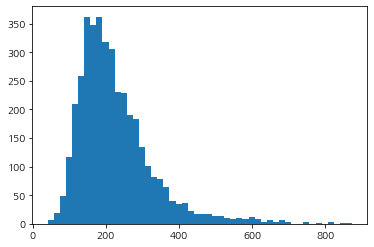

max len:  874
total mean len: 227


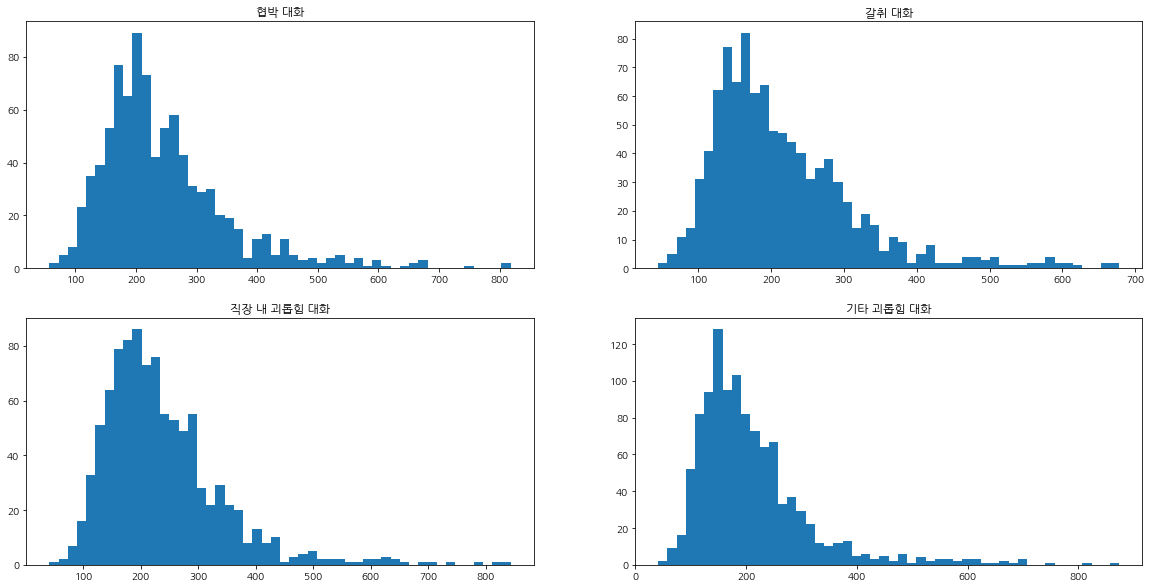

협박 대화 mean len: 246
기타 괴롭힘 대화 mean len: 210
갈취 대화 mean len: 216
직장 내 괴롭힘 대화 mean len: 238


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

# total data
plt.hist([len(review) for review in train_data['conversation']], bins=50)
plt.show()
print('max len: ', max(len(review) for review in train_data['conversation']))
print("total mean len: {0:.0f}".format(mean_len(train_data['conversation'])))


# class data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']==class_set[0]]], bins=50)
axes[0][0].set_title(class_set[0])

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']==class_set[2]]], bins=50)
axes[0][1].set_title(class_set[2])

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']==class_set[3]]], bins=50)
axes[1][0].set_title(class_set[3])

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']==class_set[1]]], bins=50)
axes[1][1].set_title(class_set[1])
plt.show()

for set in class_set:
    data = train_data[train_data['class'] == set]['conversation']
    print("{0} mean len: {1:.0f}".format(set, mean_len(data)))


### 3. 일반 대화 데이터
#### 3.1 일반 대화 데이터 로드

In [9]:
file_path = "~/aiffel/dktc/data2/normal_data.csv"  
train_normal_data = pd.read_csv(file_path)
df = train_normal_data.copy()

df['conversation_length'] = df['conversation'].str.len()
filtered_df = df[(df['conversation_length'] >= 50) & (df['conversation_length'] <= 300)]
filtered_df = filtered_df[['idx', 'class', 'conversation']]
filtered_df.to_csv('~/aiffel/dktc/data2/normal_data300.csv', index=False)

filtered_df

,idx,class,conversation
41,41,일반 대화,일본 화산 터진 거 아냐?\n머라구?키키 또?\n헐 일본?\n어뜩하냐...\n아소산...
46,46,일반 대화,얌 좀 뛰니까 배가 들어갔어?\n아니 배고파서 저녁에 뭐 먹었어\n다이어트 해야 하...
61,61,일반 대화,얌 애 키우면 인테리어는 포기지?\n. 응 없다고 봐야지...\n아기 짐이 오지게 ...
62,62,일반 대화,너 옷 어디 쇼핑몰에서 삼?\n나는 그냥 아무데서나 사는데 보이는데\n너 예전에 어...
65,65,일반 대화,다들 점심 식사 했어?\n엉 너무 배불러 ㅜㅜ\n응 나도 좀 전에 밥 먹었어\n난...
...,...,...,...
17929,17929,일반 대화,아 피자 먹고 싶다 맛있는 곳 없냐\n나는 잘 몰라\n피자보단 햄버거지\n햄버거 뭐...
17963,17963,일반 대화,오늘도 날씨 흐리더라!\n어 아까 비 오던데 ㅠㅜ\n엉 ㅠㅠ 비가 조금씩 내린다\n...
17972,17972,일반 대화,*이 동생은 그럼...\n2년 뒤로 생각 중인데...\n성별은 아무래도 상관없지?\...
17988,17988,일반 대화,야 여행 가기 너무 좋은 날씨다\n날씨 진짜 너무 좋아 **이는 일하기 싫을 날씨야...


#### 3.2 일반 대화 예시

In [10]:
print("'일반 대화'\n: {0}".format(filtered_df['conversation'].iloc[0]))

'일반 대화'
: 일본 화산 터진 거 아냐?
머라구?키키 또?
헐 일본?
어뜩하냐...
아소산인가 그거 터짐
일본은 진짜 문제 있구나 ㄷㄷ
우리 더 조심해야지 ㅠㅠ
근데 신기한 점은
와우 진짜 노재팬이야
백두산 조심해야 돼 ㅠㅠ
우리 남편 거기로 수학 여행 다녀왔대
엥 딱 그 지역으로?
일본 좋긴 한데 무서워
그때도 활화산이었대...
헐 진짜 무서운 곳이군 ㄷㄷ
무서운 곳이구나 ㅠㅠ
그 산으로!
그때 화산 부글부글 해서 대피 했었대 키키
우리나라는 백두산만 조심하면 되나? 키키
백두산 조심해얒; ㅠㅠ


#### 3.3 일반 대화 길이 시각화
- 일반 대화 길이 분포 시각화
- 일반 대화 평균 길이

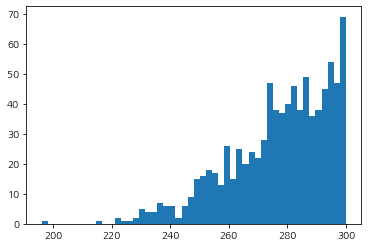

일반 대화 mean len: 277


In [11]:
data = filtered_df['conversation']

plt.hist([len(review) for review in data], bins=50)
plt.show()
print("일반 대화 mean len: {:.0f}".format(mean_len(data)))

### 4. 훈련 데이터, 일반 대화 데이터 병합

In [12]:
file_path = '~/aiffel/dktc/data2/normal_data300.csv' 
train_normal_data = pd.read_csv(file_path)

combined_df = pd.concat([train_data[['class', 'conversation']], train_normal_data[['class', 'conversation']]], ignore_index=True)
combined_df

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...
4825,일반 대화,아 피자 먹고 싶다 맛있는 곳 없냐\n나는 잘 몰라\n피자보단 햄버거지\n햄버거 뭐...
4826,일반 대화,오늘도 날씨 흐리더라!\n어 아까 비 오던데 ㅠㅜ\n엉 ㅠㅠ 비가 조금씩 내린다\n...
4827,일반 대화,*이 동생은 그럼...\n2년 뒤로 생각 중인데...\n성별은 아무래도 상관없지?\...
4828,일반 대화,야 여행 가기 너무 좋은 날씨다\n날씨 진짜 너무 좋아 **이는 일하기 싫을 날씨야...


#### 4.1 데이터 shuffle, idx 초기화

In [13]:
shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)

shuffled_df['idx'] = range(1, len(shuffled_df) + 1)
cols = ['idx'] + [col for col in shuffled_df.columns if col != 'idx']
shuffled_df = shuffled_df[cols]

shuffled_df.to_csv('~/aiffel/dktc/data2/train0.csv', index=False)
shuffled_df

,idx,class,conversation
0,1,기타 괴롭힘 대화,저기요 사장님\n네 무슨일인가요?\n제가 여기서 짜장면을 사갔는데.상태가 안좋네요....
1,2,협박 대화,어꺠를 쳤으면 사과를 해야지.\n세상이 말세다. 말세야 너가 뭔데 사과를 해라마라야...
2,3,협박 대화,이새끼야 내돈가지고와\n한번만 봐주세요 .다음주까지가지고올게요\n됏고 이새끼야 야!...
3,4,일반 대화,정촌은 버스가 늘어야 행\n너무 불편함\n버스 노선 너무 길어 ㅠㅠ\n버스가 넘 없...
4,5,직장 내 괴롭힘 대화,박과장 일로와바\n네 부르셨습니까\n요즘 이대리 일을 하는거야 마는거야\n그게 무슨...
...,...,...,...
4825,4826,기타 괴롭힘 대화,저기 이 제품 좀 꺼내서 볼 수 있나요?\n네? 어떤 제품 말씀하세요 고객님?\n여...
4826,4827,기타 괴롭힘 대화,우리 귀여운 철수야 여기 돈 줄테니까 핫도그랑 콜라좀 사다줄래? 남은 돈은 너 가져...
4827,4828,협박 대화,후보직 사퇴해\n무슨뜬금없는소리야\n니 가정 파탄나기싫으면 사퇴하라고\n내가 이런 ...
4828,4829,직장 내 괴롭힘 대화,오늘 저녁에 회사 업무 끝나고 사장님 생일 때 할 공연 준비해야하는거 알지? 다 남...


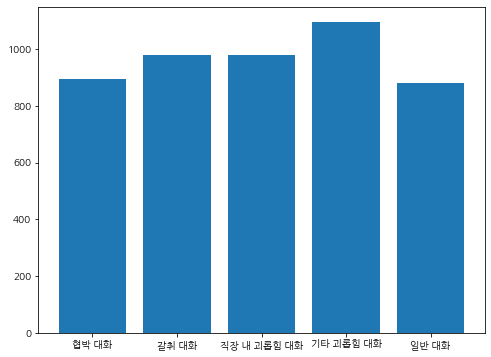

,conversation
class,
갈취 대화,981
기타 괴롭힘 대화,1094
직장 내 괴롭힘 대화,979
협박 대화,896


In [14]:
import numpy as np
class_counts = shuffled_df['class'].value_counts()

desired_order = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화','일반 대화']
class_counts = class_counts.reindex(desired_order)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=0)
plt.show()

train_data.groupby('class').count()